___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment
This assessment is very much like the Text Classification Project we just completed, and the dataset is very similar.

The **moviereviews2.tsv** dataset contains the text of 6000 movie reviews. 3000 are positive, 3000 are negative, and the text has been preprocessed as a tab-delimited file. As before, labels are given as `pos` and `neg`.

We've included 20 reviews that contain either `NaN` data, or have strings made up of whitespace.

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

### Task #1: Perform imports and load the dataset into a pandas DataFrame
For this exercise you can load the dataset from `'../TextFiles/moviereviews2.tsv'`.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
df = pd.read_csv('../TextFiles/moviereviews2.tsv', sep='\t') 

In [3]:
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


### Task #2: Check for missing values:

In [4]:
# Check for NaN values:
df.isnull().sum()

label      0
review    20
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

label     0
review    0
dtype: int64

In [7]:
# Check for whitespace strings (it's OK if there aren't any!):
white_space = []

for i, lb, rv in df.itertuples():
    if rv.isspace(): 
        white_space.append(i)

len(white_space)

0

### Task #4: Take a quick look at the `label` column:

<Axes: xlabel='label', ylabel='count'>

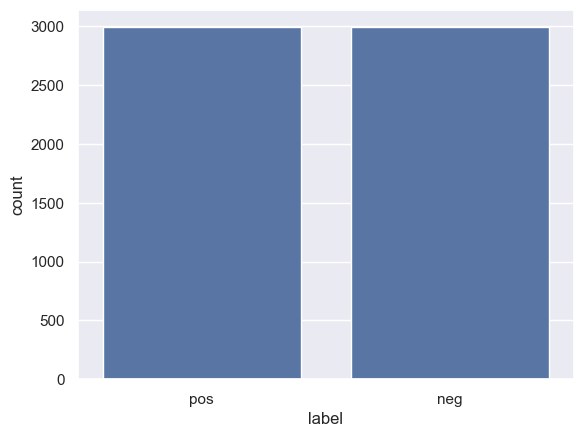

In [8]:
sns.countplot(data=df, x='label')

In [9]:
df['label'].value_counts()

label
pos    2990
neg    2990
Name: count, dtype: int64

### Task #5: Split the data into train & test sets:
You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.33, random_state=42`

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task #6: Build a pipeline to vectorize the date, then train and fit a model
You may use whatever model you like. To compare your results to the solution notebook, use `LinearSVC`.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [13]:
model = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('clf', LinearSVC())
])

model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

### Task #7: Run predictions and analyze the results

In [14]:
# Form a prediction set
predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

In [16]:
# Report the confusion matrix
print(confusion_matrix(y_true=y_test, y_pred=predictions))

[[536  60]
 [ 36 564]]


In [17]:
# Print a classification report
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

         neg       0.94      0.90      0.92       596
         pos       0.90      0.94      0.92       600

    accuracy                           0.92      1196
   macro avg       0.92      0.92      0.92      1196
weighted avg       0.92      0.92      0.92      1196



In [18]:
# Print the overall accuracy
print(accuracy_score(y_true=y_test, y_pred=predictions))

0.919732441471572


In [19]:
model.predict(['Worst movie'])

array(['neg'], dtype=object)

In [20]:
model.predict(['It was a very good movie'])

array(['pos'], dtype=object)

In [21]:
model.predict(['Not so good, not so bad. It was a average movie.'])

array(['neg'], dtype=object)

## Great job!